In [83]:
import numpy as np
import warnings
from PIL import Image
import matplotlib.pyplot as plt
from math import *

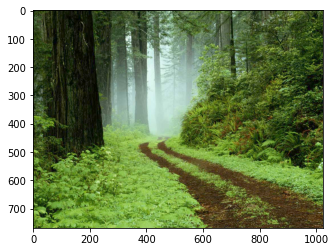

In [84]:
image= Image.open("../resources/forest.png")
plt.imshow(image)

In [85]:
def circleMask(radius):
    size = 2 * radius + 1
    mask = np.zeros((size, size))
    for i in range(0, size):
        for j in range(0, size):
            if (i - radius)**2 + (j - radius)**2 <= radius ** 2:
                mask[i,j] = 1
    return mask

In [86]:
imArr = np.asarray(image)
height, width, _ = imArr.shape
print(height, width)

768 1024


In [87]:
radius = 5
fIntensityLevels = 20
mask = circleMask(radius)
output = np.zeros(shape=imArr.shape)
intensityCache = (np.sum(imArr, axis=2) / 3 * fIntensityLevels / 255.).astype('int')
print(intensityCache.shape)
for i in range(0, height):
    for j in range(0, width):
        intensityBins = [0 for i in range(256)]
        averageR = [0 for i in range(256)]
        averageB = [0 for i in range(256)]
        averageG = [0 for i in range(256)]
        for n in range(2 * radius + 1):
            for m in range(2 * radius + 1):
                if mask[n, m] == 0:
                    continue
                indexh = i + (n - radius)
                indexw = j + (m - radius)
                if (indexh < 0 or indexh >= height or indexw < 0 or indexw >= width):
                    continue
                intensity = intensityCache[indexh, indexw]
                if intensity > 255:
                    intensity = 255
                intensityBins[intensity] += 1
                averageR[intensity] += imArr[indexh, indexw, 0]
                averageG[intensity] += imArr[indexh, indexw, 1]
                averageB[intensity] += imArr[indexh, indexw, 2]
        maxIndex = 0
        curMax = 0
        for k in range(0,256):
            if intensityBins[k] > curMax:
                curMax = intensityBins[k]
                maxIndex = k
        output[i,j,0] = averageR[maxIndex] / intensityBins[maxIndex] / 255
        output[i,j,1] = averageG[maxIndex] / intensityBins[maxIndex] / 255
        output[i,j,2] = averageB[maxIndex] / intensityBins[maxIndex] / 255

(768, 1024)


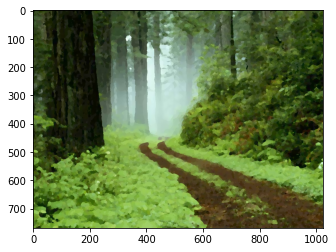

In [88]:
plt.imshow(output)